<center><h1>Decision Trees on Accute Inamations Data</h1></center>
<br>
<br>

Name: Chengyi Li
<br>
Github Username: ChengyiLi98
<br>

## 1. Decision Trees as Interpretable Models

Import packages

In [1]:
import pandas as pd
import math
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

import matplotlib.pyplot as plt
import seaborn as sns

from skmultilearn.problem_transform import LabelPowerset
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import _tree
from sklearn.model_selection import cross_val_score, KFold
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import RidgeCV, Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso,LassoCV

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import xgboost as xgb
from xgboost import XGBRegressor
%matplotlib inline

### (a) Obtain Data

Get the Accute Inamations Data Set

In [2]:
path1 = r'../data/diagnosis.data'
df_diag = pd.read_csv(path1, sep='\s+', encoding='UTF-16', header = None, decimal=',')
# splitting the data based on one or more whitespace characters (tabs or spaces)
# recognize a comma as the decimal point character
df_diag.columns = ['Temperature of patient', 'Occurrence of nausea', 'Lumbar pain', 'Urine pushing', 'Micturition pains', 'Burning of urethra, itch, swelling of urethra outlet', 'Inflammation of urinary bladder', 'Nephritis of renal pelvis origin']
df_diag

Temperature of patient Occurrence of nausea Lumbar pain Urine pushing  \
0                      35.5                   no         yes            no   
1                      35.9                   no          no           yes   
2                      35.9                   no         yes            no   
3                      36.0                   no          no           yes   
4                      36.0                   no         yes            no   
..                      ...                  ...         ...           ...   
115                    41.4                   no         yes           yes   
116                    41.5                   no          no            no   
117                    41.5                  yes         yes            no   
118                    41.5                   no         yes           yes   
119                    41.5                   no         yes           yes   

    Micturition pains Burning of urethra, itch, swelling of urethra outlet  \
0                  no                                                 no     
1                 yes                                                yes     
2                  no                                                 no     
3                 yes                                                yes     
4                  no                                                 no     
..                ...                                                ...     
115                no                                                yes     
116                no                                                 no     
117               yes                                                 no     
118                no                                                yes     
119                no                                                yes     

    Inflammation of urinary bladder Nephritis of renal pelvis origin  
0                                no                               no  
1                               yes                               no  
2                                no                               no  
3                               yes                               no  
4                                no                               no  
..                              ...                              ...  
115                              no                              yes  
116                              no                               no  
117                              no                              yes  
118                              no                              yes  
119                              no                              yes  

[120 rows x 8 columns]

Attribute Information:

a1 Temperature of patient { 35C-42C }

a2 Occurrence of nausea { yes, no }

a3 Lumbar pain { yes, no }

a4 Urine pushing (continuous need for urination) { yes, no }

a5 Micturition pains { yes, no }

a6 Burning of urethra, itch, swelling of urethra outlet { yes, no }

Output:

d1 decision: Inflammation of urinary bladder { yes, no }

d2 decision: Nephritis of renal pelvis origin { yes, no } 

In [3]:
map_yn = {'yes': 1, 'no': 0}
for col in df_diag.columns[1:]:
    df_diag[col] = df_diag[col].map(map_yn)
df_diag

Temperature of patient  Occurrence of nausea  Lumbar pain  Urine pushing  \
0                      35.5                     0            1              0   
1                      35.9                     0            0              1   
2                      35.9                     0            1              0   
3                      36.0                     0            0              1   
4                      36.0                     0            1              0   
..                      ...                   ...          ...            ...   
115                    41.4                     0            1              1   
116                    41.5                     0            0              0   
117                    41.5                     1            1              0   
118                    41.5                     0            1              1   
119                    41.5                     0            1              1   

     Micturition pains  Burning of urethra, itch, swelling of urethra outlet  \
0                    0                                                  0      
1                    1                                                  1      
2                    0                                                  0      
3                    1                                                  1      
4                    0                                                  0      
..                 ...                                                ...      
115                  0                                                  1      
116                  0                                                  0      
117                  1                                                  0      
118                  0                                                  1      
119                  0                                                  1      

     Inflammation of urinary bladder  Nephritis of renal pelvis origin  
0                                  0                                 0  
1                                  1                                 0  
2                                  0                                 0  
3                                  1                                 0  
4                                  0                                 0  
..                               ...                               ...  
115                                0                                 1  
116                                0                                 0  
117                                0                                 1  
118                                0                                 1  
119                                0                                 1  

[120 rows x 8 columns]

### (b) Build a decision tree

[Text(0.4, 0.9, 'Temperature of patient <= 37.95\ngini = 0.493\nsamples = 120\nvalue = [[61, 59]\n[70, 50]]'),
 Text(0.2, 0.7, 'Urine pushing <= 0.5\ngini = 0.222\nsamples = 60\nvalue = [[20, 40]\n[60, 0]]'),
 Text(0.1, 0.5, 'gini = 0.0\nsamples = 20\nvalue = [[20, 0]\n[20, 0]]'),
 Text(0.3, 0.5, 'gini = 0.0\nsamples = 40\nvalue = [[0, 40]\n[40, 0]]'),
 Text(0.6, 0.7, 'Lumbar pain <= 0.5\ngini = 0.355\nsamples = 60\nvalue = [[41, 19]\n[10, 50]]'),
 Text(0.5, 0.5, 'gini = 0.0\nsamples = 10\nvalue = [[10, 0]\n[10, 0]]'),
 Text(0.7, 0.5, 'Occurrence of nausea <= 0.5\ngini = 0.236\nsamples = 50\nvalue = [[31, 19]\n[0, 50]]'),
 Text(0.6, 0.3, 'gini = 0.0\nsamples = 21\nvalue = [[21, 0]\n[0, 21]]'),
 Text(0.8, 0.3, 'Urine pushing <= 0.5\ngini = 0.226\nsamples = 29\nvalue = [[10, 19]\n[0, 29]]'),
 Text(0.7, 0.1, 'gini = 0.0\nsamples = 10\nvalue = [[10, 0]\n[0, 10]]'),
 Text(0.9, 0.1, 'gini = 0.0\nsamples = 19\nvalue = [[0, 19]\n[0, 19]]')]

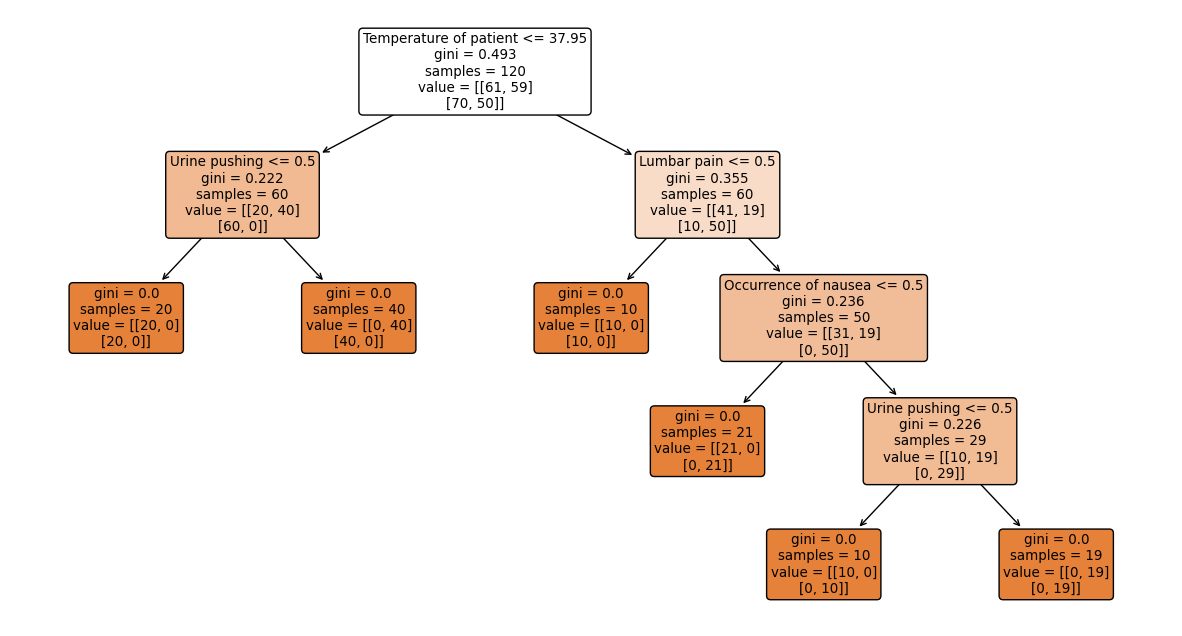

In [4]:
X = df_diag.iloc[:, :6]
y = df_diag.iloc[:, -2:]

classifier = DecisionTreeClassifier(random_state=66)
classifier.fit(X, y)

plt.figure(figsize=(15, 8))
plot_tree(classifier, filled=True, rounded=True, feature_names=X.columns,class_names=True)

### (c) Convert the decision rules

In [5]:
def tree_to_code(tree, feature_names):
	"""
	Outputs a decision tree model as a Python function
	
	Parameters:
	-----------
	tree: decision tree model
		The decision tree to represent as a function
	feature_names: list
		The feature names of the dataset used for building the decision tree
	"""

	tree_ = tree.tree_
	feature_name = [
		feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
		for i in tree_.feature
	]
	print("def tree({}):".format(", ".join(feature_names)))

	def recurse(node, depth):
		indent = "  " * depth
		if tree_.feature[node] != _tree.TREE_UNDEFINED:
			name = feature_name[node]
			threshold = tree_.threshold[node]
			print("{}if {} <= {}:".format(indent, name, threshold))
			recurse(tree_.children_left[node], depth + 1)
			print("{}else:  # if {} > {}".format(indent, name, threshold))
			recurse(tree_.children_right[node], depth + 1)
		else:
			print("{}return {}".format(indent, tree_.value[node]))

	recurse(0, 1)

In [6]:
tree_to_code(classifier, X.columns)

def tree(Temperature of patient, Occurrence of nausea, Lumbar pain, Urine pushing, Micturition pains, Burning of urethra, itch, swelling of urethra outlet):
  if Temperature of patient <= 37.95000076293945:
    if Urine pushing <= 0.5:
      return [[20.  0.]
 [20.  0.]]
    else:  # if Urine pushing > 0.5
      return [[ 0. 40.]
 [40.  0.]]
  else:  # if Temperature of patient > 37.95000076293945
    if Lumbar pain <= 0.5:
      return [[10.  0.]
 [10.  0.]]
    else:  # if Lumbar pain > 0.5
      if Occurrence of nausea <= 0.5:
        return [[21.  0.]
 [ 0. 21.]]
      else:  # if Occurrence of nausea > 0.5
        if Urine pushing <= 0.5:
          return [[10.  0.]
 [ 0. 10.]]
        else:  # if Urine pushing > 0.5
          return [[ 0. 19.]
 [ 0. 19.]]


### (d) Use cost-complexity pruning to find a minimal decision tree and a set of decision rules with high interpretability.

In [7]:
# use the whole data to build a initial decision tree
X = df_diag.iloc[:, :6]
y = df_diag.iloc[:, -2:]

tree = DecisionTreeClassifier()
tree.fit(X, y)

# Calculate the cost complexity of each node
ccp_alphas = tree.cost_complexity_pruning_path(X, y)['ccp_alphas']

# Calculate the total cost complexity for the tree
classifier_list = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf, X, y, cv=5)  # 5-fold cross-validation
    classifier_list.append((clf, np.mean(scores)))
    print(f'For ccp_alpha = {clf.ccp_alpha}, cross-validation score is {np.mean(scores)}')


For ccp_alpha = 0.0, cross-validation score is 0.95
For ccp_alpha = 0.04908333333333333, cross-validation score is 0.7416666666666667
For ccp_alpha = 0.07947222222222226, cross-validation score is 0.7083333333333333
For ccp_alpha = 0.1111111111111111, cross-validation score is 0.5666666666666667
For ccp_alpha = 0.204236111111111, cross-validation score is 0.2


This result above means the minimal decision tree I find is just the original tree using the whole data, with ccp_alpha = 0, because it has the highest cross-validation scores.

Find a set of decision rules with high interpretability

In [8]:
def tree_to_pseudo(tree, feature_names):
	"""
	Outputs a decision tree model as if/then pseudocode
	
	Parameters:
	-----------
	tree: decision tree model
		The decision tree to represent as pseudocode
	feature_names: list
		The feature names of the dataset used for building the decision tree
	"""

	left = tree.tree_.children_left
	right = tree.tree_.children_right
	threshold = tree.tree_.threshold
	features = [feature_names[i] for i in tree.tree_.feature]
	value = tree.tree_.value

	def recurse(left, right, threshold, features, node, depth=0):
		indent = "  " * depth
		if (threshold[node] != -2):
			print(indent,"if ( " + features[node] + " <= " + str(threshold[node]) + " ) {")
			if left[node] != -1:
				recurse (left, right, threshold, features, left[node], depth+1)
				print(indent,"} else {")
				if right[node] != -1:
					recurse (left, right, threshold, features, right[node], depth+1)
				print(indent,"}")
		else:
			print(indent,"return " + str(value[node]))

	recurse(left, right, threshold, features, 0)

In [9]:
tree_to_pseudo(tree, X.columns)

 if ( Temperature of patient <= 37.95000076293945 ) {
   if ( Urine pushing <= 0.5 ) {
     return [[20.  0.]
 [20.  0.]]
   } else {
     return [[ 0. 40.]
 [40.  0.]]
   }
 } else {
   if ( Lumbar pain <= 0.5 ) {
     return [[10.  0.]
 [10.  0.]]
   } else {
     if ( Micturition pains <= 0.5 ) {
       return [[21.  0.]
 [ 0. 21.]]
     } else {
       if ( Urine pushing <= 0.5 ) {
         return [[10.  0.]
 [ 0. 10.]]
       } else {
         return [[ 0. 19.]
 [ 0. 19.]]
       }
     }
   }
 }


## 2. The LASSO and Boosting for Regression

### (a) Obtain Data

In [10]:
path2 = r'../data/communities.data'
df_comm = pd.read_csv(path2, header = None)
df_comm

0   1      2                    3    4     5     6     7     8     9    \
0       8   ?      ?         Lakewoodcity    1  0.19  0.33  0.02  0.90  0.12   
1      53   ?      ?          Tukwilacity    1  0.00  0.16  0.12  0.74  0.45   
2      24   ?      ?         Aberdeentown    1  0.00  0.42  0.49  0.56  0.17   
3      34   5  81440  Willingborotownship    1  0.04  0.77  1.00  0.08  0.12   
4      42  95   6096    Bethlehemtownship    1  0.01  0.55  0.02  0.95  0.09   
...   ...  ..    ...                  ...  ...   ...   ...   ...   ...   ...   
1989   12   ?      ?    TempleTerracecity   10  0.01  0.40  0.10  0.87  0.12   
1990    6   ?      ?          Seasidecity   10  0.05  0.96  0.46  0.28  0.83   
1991    9   9  80070        Waterburytown   10  0.16  0.37  0.25  0.69  0.04   
1992   25  17  72600          Walthamcity   10  0.08  0.51  0.06  0.87  0.22   
1993    6   ?      ?          Ontariocity   10  0.20  0.78  0.14  0.46  0.24   

      ...   118   119   120   121   122   123  124   125   126   127  
0     ...  0.12  0.26  0.20  0.06  0.04   0.9  0.5  0.32  0.14  0.20  
1     ...  0.02  0.12  0.45     ?     ?     ?    ?  0.00     ?  0.67  
2     ...  0.01  0.21  0.02     ?     ?     ?    ?  0.00     ?  0.43  
3     ...  0.02  0.39  0.28     ?     ?     ?    ?  0.00     ?  0.12  
4     ...  0.04  0.09  0.02     ?     ?     ?    ?  0.00     ?  0.03  
...   ...   ...   ...   ...   ...   ...   ...  ...   ...   ...   ...  
1989  ...  0.01  0.28  0.05     ?     ?     ?    ?  0.00     ?  0.09  
1990  ...  0.02  0.37  0.20     ?     ?     ?    ?  0.00     ?  0.45  
1991  ...  0.08  0.32  0.18  0.08  0.06  0.78    0  0.91  0.28  0.23  
1992  ...  0.03  0.38  0.33  0.02  0.02  0.79    0  0.22  0.18  0.19  
1993  ...  0.11  0.30  0.05  0.08  0.04  0.73  0.5  1.00  0.13  0.48  

[1994 rows x 128 columns]

In [11]:
word_list = []
path3 = r'../data/communities.names'
with open(path3,'r') as f:
    attribute_lines = [line for line in f if line.startswith('@attribute')]
    
for line in attribute_lines:
    word = line[10:]
    word = word[:-1]
    word = word.strip()
    word_list.append(word)
df_comm.columns = word_list
df_comm

state numeric county numeric community numeric communityname string  \
0                 8              ?                 ?         Lakewoodcity   
1                53              ?                 ?          Tukwilacity   
2                24              ?                 ?         Aberdeentown   
3                34              5             81440  Willingborotownship   
4                42             95              6096    Bethlehemtownship   
...             ...            ...               ...                  ...   
1989             12              ?                 ?    TempleTerracecity   
1990              6              ?                 ?          Seasidecity   
1991              9              9             80070        Waterburytown   
1992             25             17             72600          Walthamcity   
1993              6              ?                 ?          Ontariocity   

      fold numeric  population numeric  householdsize numeric  \
0                1                0.19                   0.33   
1                1                0.00                   0.16   
2                1                0.00                   0.42   
3                1                0.04                   0.77   
4                1                0.01                   0.55   
...            ...                 ...                    ...   
1989            10                0.01                   0.40   
1990            10                0.05                   0.96   
1991            10                0.16                   0.37   
1992            10                0.08                   0.51   
1993            10                0.20                   0.78   

      racepctblack numeric  racePctWhite numeric  racePctAsian numeric  ...  \
0                     0.02                  0.90                  0.12  ...   
1                     0.12                  0.74                  0.45  ...   
2                     0.49                  0.56                  0.17  ...   
3                     1.00                  0.08                  0.12  ...   
4                     0.02                  0.95                  0.09  ...   
...                    ...                   ...                   ...  ...   
1989                  0.10                  0.87                  0.12  ...   
1990                  0.46                  0.28                  0.83  ...   
1991                  0.25                  0.69                  0.04  ...   
1992                  0.06                  0.87                  0.22  ...   
1993                  0.14                  0.46                  0.24  ...   

      LandArea numeric  PopDens numeric  PctUsePubTrans numeric  \
0                 0.12             0.26                    0.20   
1                 0.02             0.12                    0.45   
2                 0.01             0.21                    0.02   
3                 0.02             0.39                    0.28   
4                 0.04             0.09                    0.02   
...                ...              ...                     ...   
1989              0.01             0.28                    0.05   
1990              0.02             0.37                    0.20   
1991              0.08             0.32                    0.18   
1992              0.03             0.38                    0.33   
1993              0.11             0.30                    0.05   

      PolicCars numeric  PolicOperBudg numeric  LemasPctPolicOnPatr numeric  \
0                  0.06                   0.04                          0.9   
1                     ?                      ?                            ?   
2                     ?                      ?                            ?   
3                     ?                      ?                            ?   
4                     ?                      ?                            ?   
...                 ...                    ...                          

In [12]:
df_comm.replace("?", np.nan, inplace=True)
df_comm

state numeric county numeric community numeric communityname string  \
0                 8            NaN               NaN         Lakewoodcity   
1                53            NaN               NaN          Tukwilacity   
2                24            NaN               NaN         Aberdeentown   
3                34              5             81440  Willingborotownship   
4                42             95              6096    Bethlehemtownship   
...             ...            ...               ...                  ...   
1989             12            NaN               NaN    TempleTerracecity   
1990              6            NaN               NaN          Seasidecity   
1991              9              9             80070        Waterburytown   
1992             25             17             72600          Walthamcity   
1993              6            NaN               NaN          Ontariocity   

      fold numeric  population numeric  householdsize numeric  \
0                1                0.19                   0.33   
1                1                0.00                   0.16   
2                1                0.00                   0.42   
3                1                0.04                   0.77   
4                1                0.01                   0.55   
...            ...                 ...                    ...   
1989            10                0.01                   0.40   
1990            10                0.05                   0.96   
1991            10                0.16                   0.37   
1992            10                0.08                   0.51   
1993            10                0.20                   0.78   

      racepctblack numeric  racePctWhite numeric  racePctAsian numeric  ...  \
0                     0.02                  0.90                  0.12  ...   
1                     0.12                  0.74                  0.45  ...   
2                     0.49                  0.56                  0.17  ...   
3                     1.00                  0.08                  0.12  ...   
4                     0.02                  0.95                  0.09  ...   
...                    ...                   ...                   ...  ...   
1989                  0.10                  0.87                  0.12  ...   
1990                  0.46                  0.28                  0.83  ...   
1991                  0.25                  0.69                  0.04  ...   
1992                  0.06                  0.87                  0.22  ...   
1993                  0.14                  0.46                  0.24  ...   

      LandArea numeric  PopDens numeric  PctUsePubTrans numeric  \
0                 0.12             0.26                    0.20   
1                 0.02             0.12                    0.45   
2                 0.01             0.21                    0.02   
3                 0.02             0.39                    0.28   
4                 0.04             0.09                    0.02   
...                ...              ...                     ...   
1989              0.01             0.28                    0.05   
1990              0.02             0.37                    0.20   
1991              0.08             0.32                    0.18   
1992              0.03             0.38                    0.33   
1993              0.11             0.30                    0.05   

      PolicCars numeric  PolicOperBudg numeric  LemasPctPolicOnPatr numeric  \
0                  0.06                   0.04                          0.9   
1                   NaN                    NaN                          NaN   
2                   NaN                    NaN                          NaN   
3                   NaN                    NaN                          NaN   
4                   NaN                    NaN                          NaN   
...                 ...                    ...                          

In [13]:
train_set = df_comm.copy().iloc[:1495, :]
test_set = df_comm.copy().iloc[1495:, :]

### (b) Missing values

In [14]:
# Train the imputer ONLY on the training set. Then impute the test set using that imputer.
non_pred_cols = ['state numeric','county numeric','community numeric','communityname string','fold numeric']
pred_cols = [col for col in train_set.columns if col not in non_pred_cols]

#imputer = KNNImputer(n_neighbors=5)
imputer = SimpleImputer(strategy='mean')
imputer.fit(train_set[pred_cols])

train_set[pred_cols] = imputer.transform(train_set[pred_cols])
train_set = train_set[pred_cols]

test_set[pred_cols] = imputer.transform(test_set[pred_cols])
test_set = test_set[pred_cols]

df_comm = pd.concat([train_set, test_set], axis=0)
df_comm

population numeric  householdsize numeric  racepctblack numeric  \
0                   0.19                   0.33                  0.02   
1                   0.00                   0.16                  0.12   
2                   0.00                   0.42                  0.49   
3                   0.04                   0.77                  1.00   
4                   0.01                   0.55                  0.02   
...                  ...                    ...                   ...   
1989                0.01                   0.40                  0.10   
1990                0.05                   0.96                  0.46   
1991                0.16                   0.37                  0.25   
1992                0.08                   0.51                  0.06   
1993                0.20                   0.78                  0.14   

      racePctWhite numeric  racePctAsian numeric  racePctHisp numeric  \
0                     0.90                  0.12                 0.17   
1                     0.74                  0.45                 0.07   
2                     0.56                  0.17                 0.04   
3                     0.08                  0.12                 0.10   
4                     0.95                  0.09                 0.05   
...                    ...                   ...                  ...   
1989                  0.87                  0.12                 0.16   
1990                  0.28                  0.83                 0.32   
1991                  0.69                  0.04                 0.25   
1992                  0.87                  0.22                 0.10   
1993                  0.46                  0.24                 0.77   

      agePct12t21 numeric  agePct12t29 numeric  agePct16t24 numeric  \
0                    0.34                 0.47                 0.29   
1                    0.26                 0.59                 0.35   
2                    0.39                 0.47                 0.28   
3                    0.51                 0.50                 0.34   
4                    0.38                 0.38                 0.23   
...                   ...                  ...                  ...   
1989                 0.43                 0.51                 0.35   
1990                 0.69                 0.86                 0.73   
1991                 0.35                 0.50                 0.31   
1992                 0.58                 0.74                 0.63   
1993                 0.50                 0.62                 0.40   

      agePct65up numeric  ...  LandArea numeric  PopDens numeric  \
0                   0.32  ...              0.12             0.26   
1                   0.27  ...              0.02             0.12   
2                   0.32  ...              0.01             0.21   
3                   0.21  ...              0.02             0.39   
4                   0.36  ...              0.04             0.09   
...                  ...  ...               ...              ...   
1989                0.30  ...              0.01             0.28   
1990                0.14  ...              0.02             0.37   
1991                0.54  ...              0.08             0.32   
1992                0.41  ...              0.03             0.38   
1993                0.17  ...              0.11             0.30   

      PctUsePubTrans numeric  PolicCars numeric  PolicOperBudg numeric  \
0                       0.20           0.060000               0.040000   
1                       0.45           0.163975               0.080502   
2                       0.02           0.163975               0.080502   
3                       0.28           0.163975               0.080502   
4                       0.02           0.163975               0.080502   
...                      ...                ...                    ...   
1989                    0.05           0.163975               0.

### (c) Plot a correlation matrix

<Axes: >

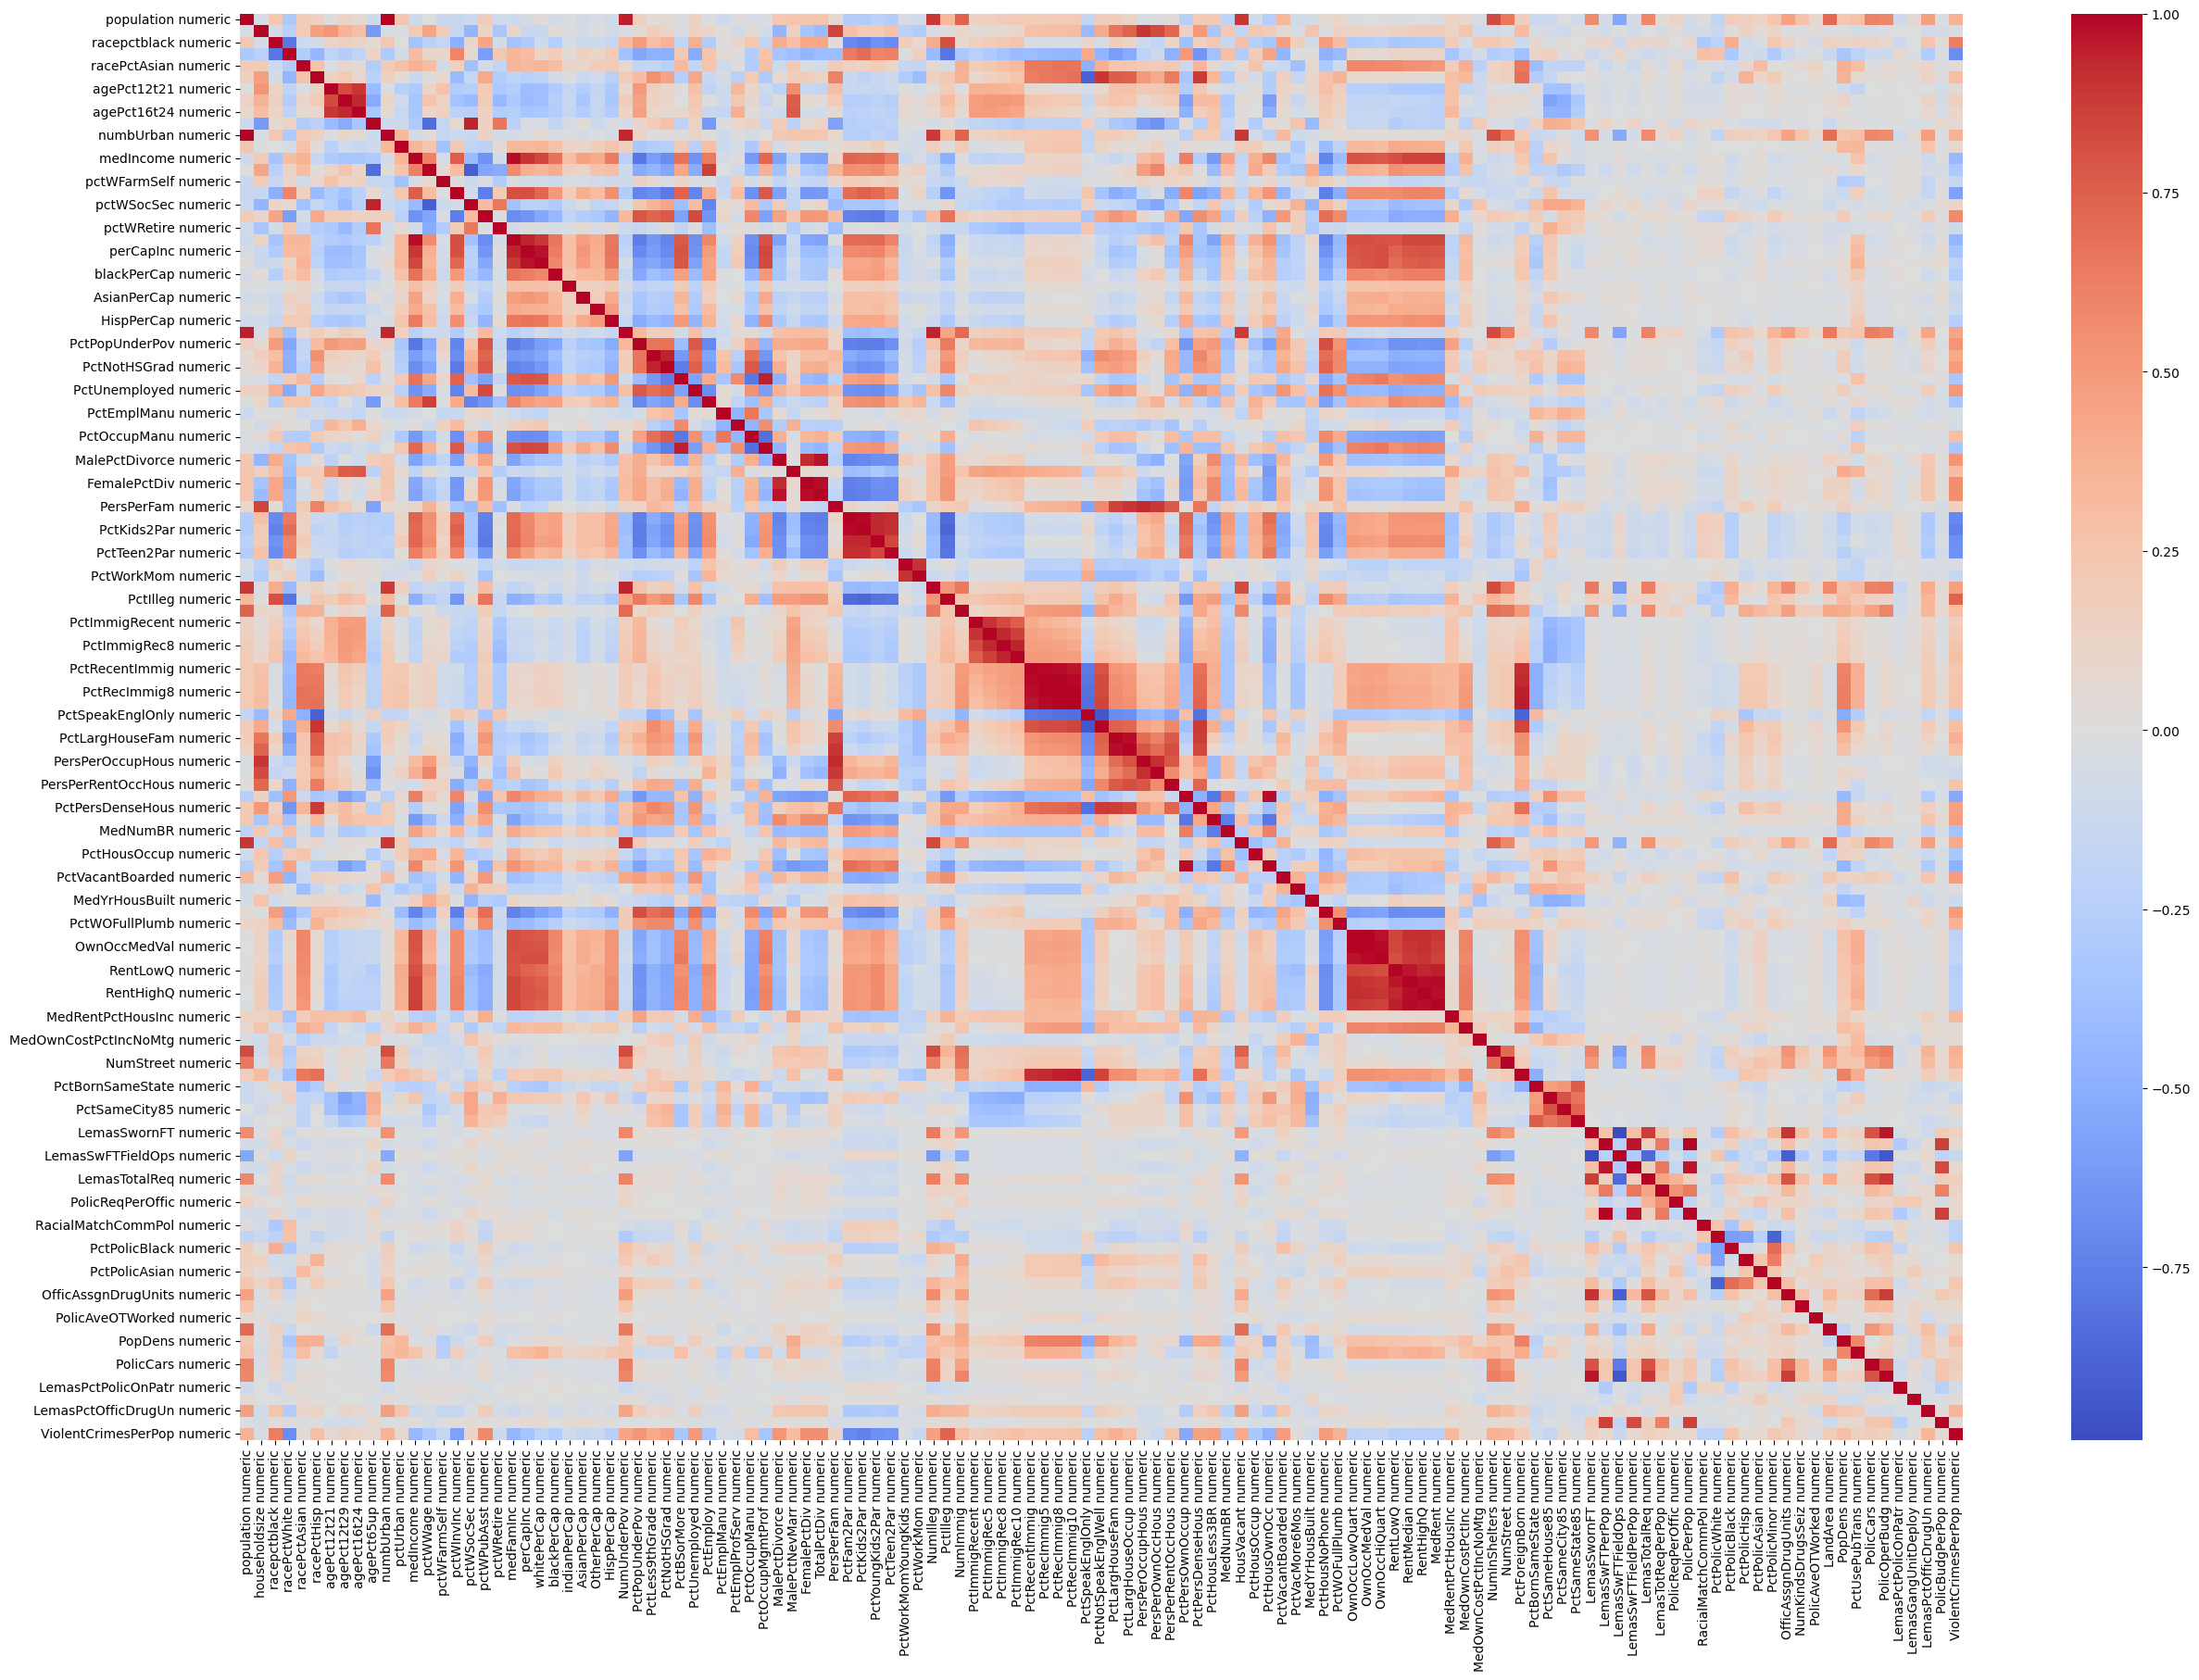

In [15]:
plt.figure(figsize=(30, 20))  # Set the size of the heatmap
sns.heatmap(df_comm.corr(), cmap='coolwarm', annot=False, fmt=".2f")

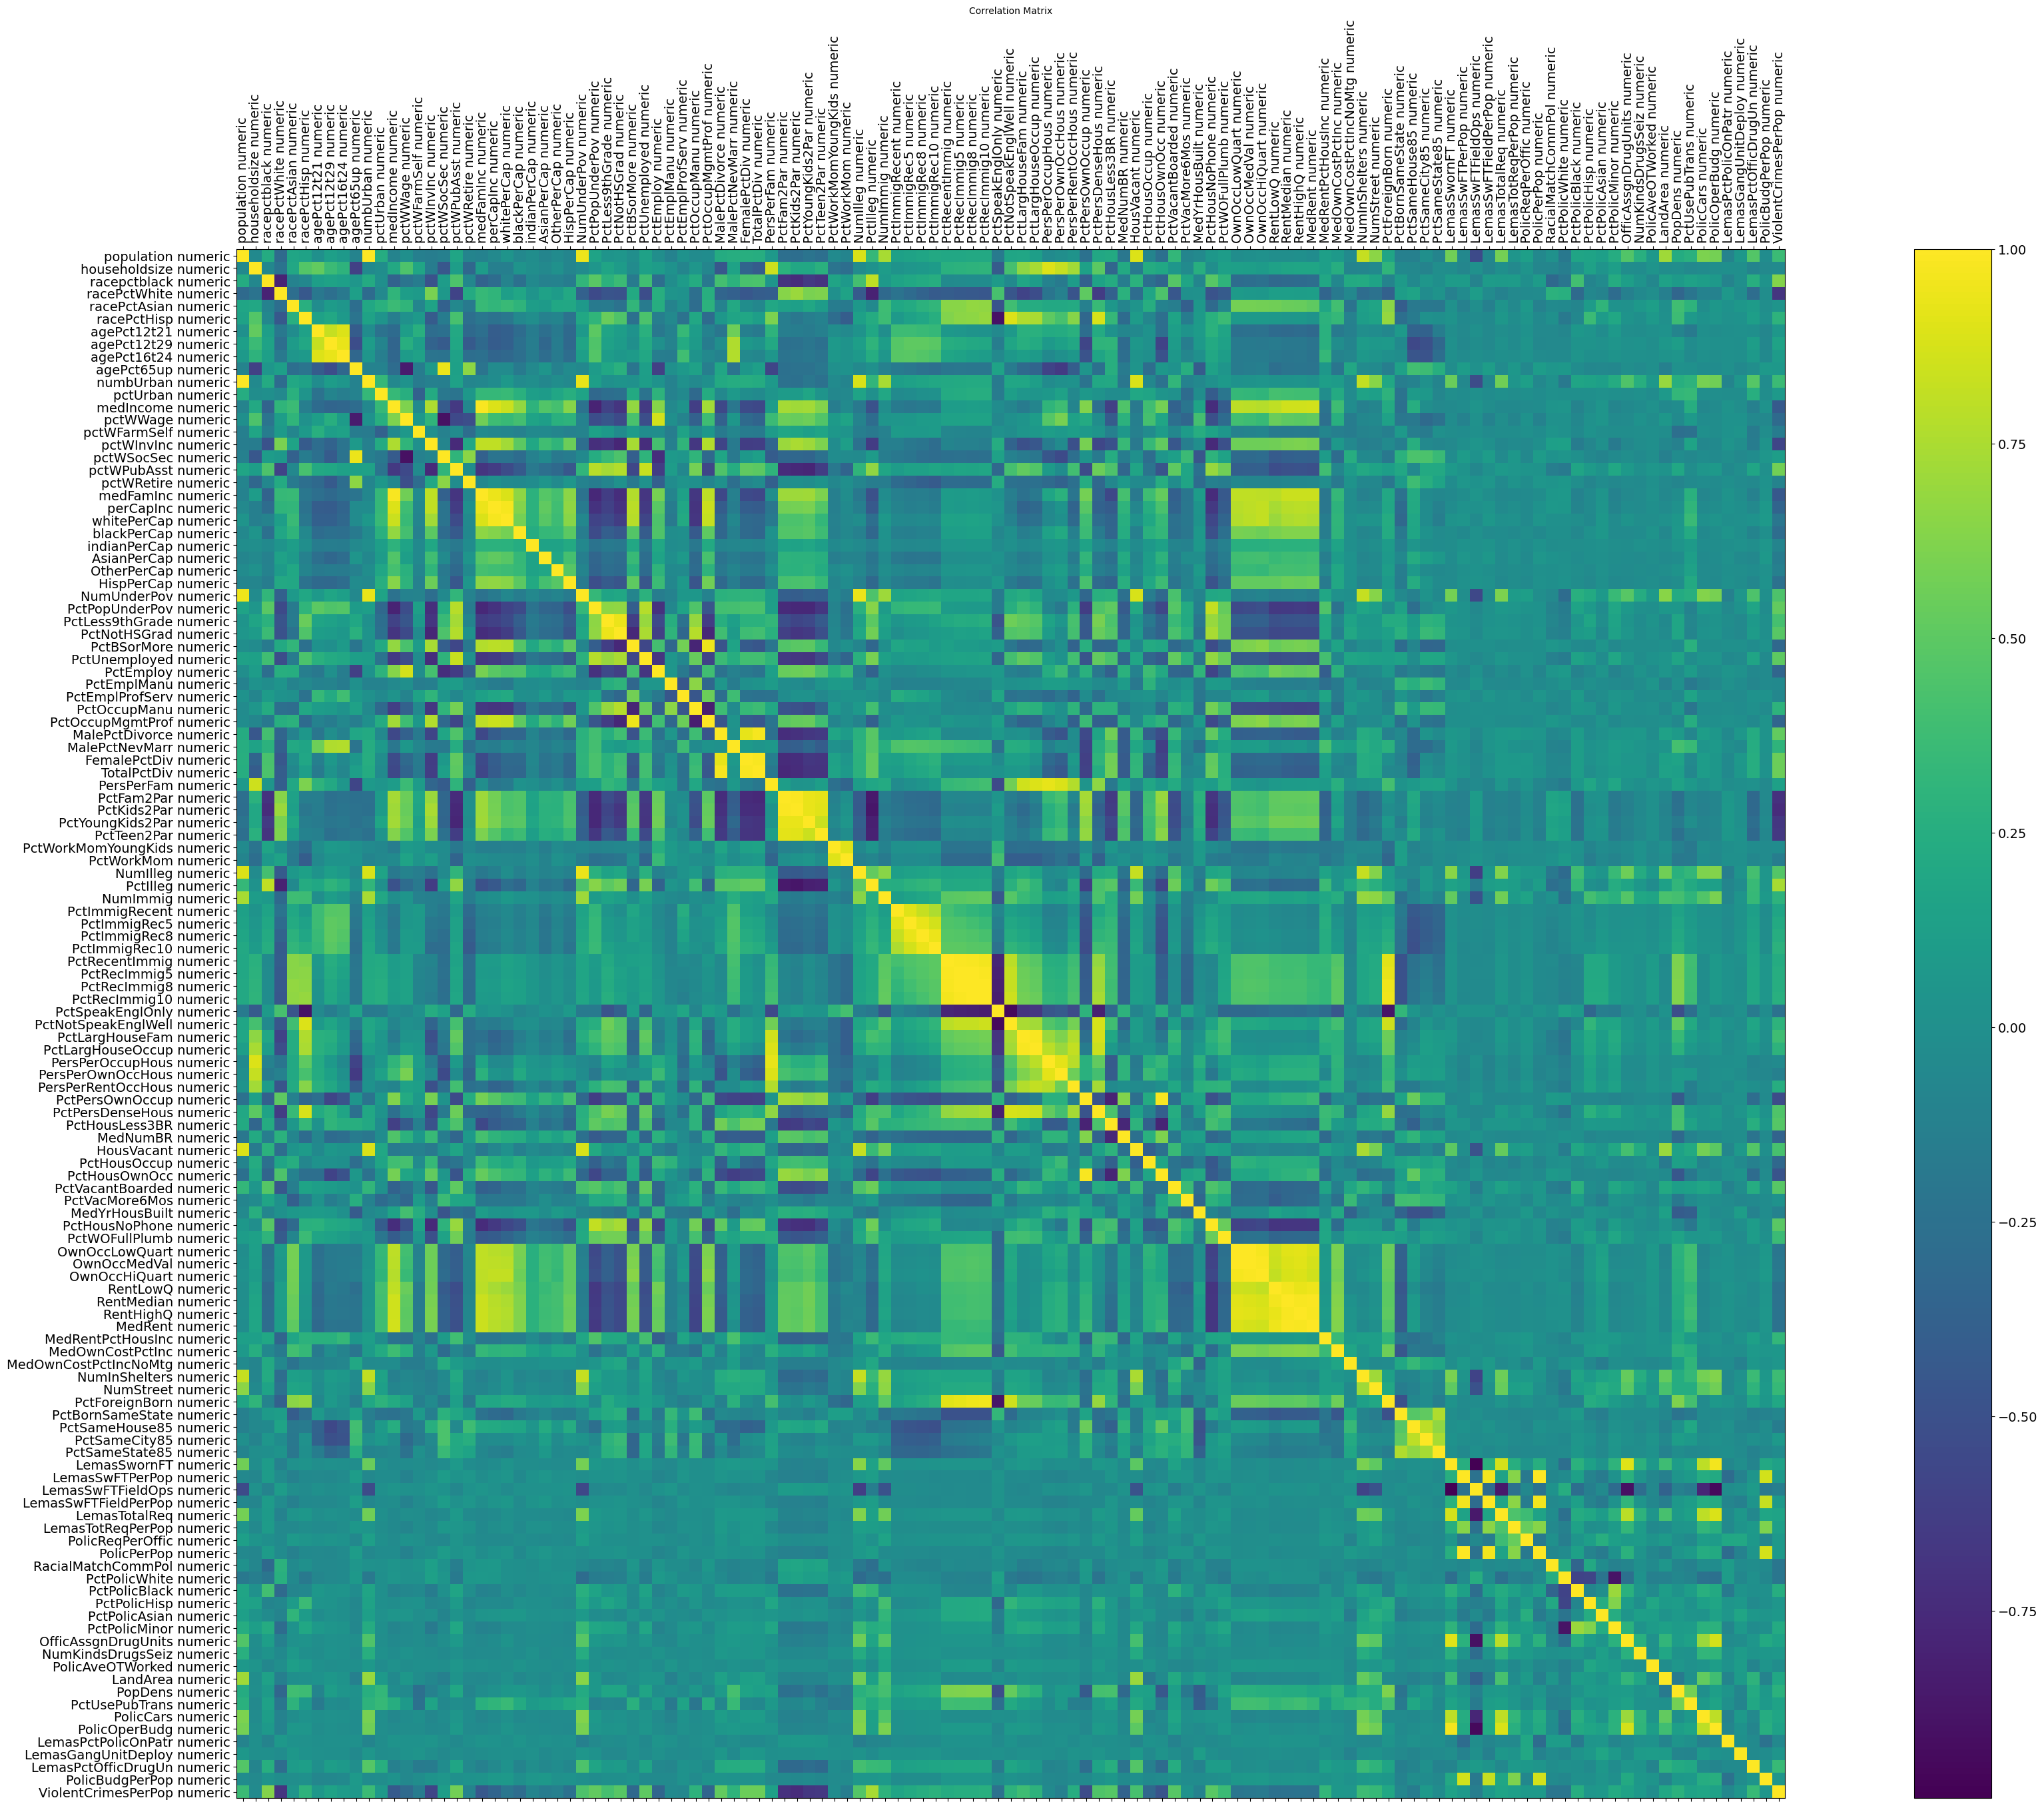

In [16]:
# another way for this part
f = plt.figure(figsize=(50, 30))
plt.matshow(df_comm.corr(), fignum=f.number)
plt.xticks(range(df_comm.select_dtypes(['number']).shape[1]), df_comm.select_dtypes(['number']).columns, fontsize=14, rotation = 90)
plt.yticks(range(df_comm.select_dtypes(['number']).shape[1]), df_comm.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=10);

### (d) Calculate the Coefficient of Variation CV

In [17]:
cv = df_comm.std() / df_comm.mean()
cv_df = pd.DataFrame({'Feature': cv.index, 'Coefficient of Variation': cv.values})
cv_df

Feature  Coefficient of Variation
0             population numeric                  2.203503
1          householdsize numeric                  0.353298
2           racepctblack numeric                  1.410920
3           racePctWhite numeric                  0.323782
4           racePctAsian numeric                  1.359162
..                           ...                       ...
118  LemasPctPolicOnPatr numeric                  0.120471
119  LemasGangUnitDeploy numeric                  0.360299
120  LemasPctOfficDrugUn numeric                  2.555266
121      PolicBudgPerPop numeric                  0.343782
122  ViolentCrimesPerPop numeric                  0.979015

[123 rows x 2 columns]

### (e) Scatter plots and box plots for highest CV features

In [18]:
num_feature = math.floor(math.sqrt(128))
highest_feature_df = cv_df.sort_values(by="Coefficient of Variation", ascending = False).head(num_feature)
highest_feature_df

Feature  Coefficient of Variation
90             NumStreet numeric                  4.407702
89         NumInShelters numeric                  3.485481
49              NumIlleg numeric                  2.994196
51              NumImmig numeric                  2.900497
120  LemasPctOfficDrugUn numeric                  2.555266
27           NumUnderPov numeric                  2.304970
0             population numeric                  2.203503
10             numbUrban numeric                  2.001744
71            HousVacant numeric                  1.958780
113             LandArea numeric                  1.678031
5            racePctHisp numeric                  1.614278

In [19]:
selected_col = highest_feature_df['Feature']
selected_df = df_comm[selected_col]
selected_df

NumStreet numeric  NumInShelters numeric  NumIlleg numeric  \
0                  0.00                   0.04              0.04   
1                  0.00                   0.00              0.00   
2                  0.00                   0.00              0.01   
3                  0.00                   0.00              0.03   
4                  0.00                   0.00              0.00   
...                 ...                    ...               ...   
1989               0.00                   0.00              0.00   
1990               0.00                   0.01              0.03   
1991               0.02                   0.06              0.13   
1992               0.01                   0.04              0.02   
1993               0.08                   0.08              0.11   

      NumImmig numeric  LemasPctOfficDrugUn numeric  NumUnderPov numeric  \
0                 0.03                         0.32                 0.08   
1                 0.01                         0.00                 0.01   
2                 0.00                         0.00                 0.01   
3                 0.02                         0.00                 0.01   
4                 0.00                         0.00                 0.00   
...                ...                          ...                  ...   
1989              0.01                         0.00                 0.01   
1990              0.05                         0.00                 0.04   
1991              0.06                         0.91                 0.12   
1992              0.06                         0.22                 0.03   
1993              0.20                         1.00                 0.16   

      population numeric  numbUrban numeric  HousVacant numeric  \
0                   0.19               0.20                0.21   
1                   0.00               0.02                0.02   
2                   0.00               0.00                0.01   
3                   0.04               0.06                0.01   
4                   0.01               0.02                0.01   
...                  ...                ...                 ...   
1989                0.01               0.03                0.02   
1990                0.05               0.06                0.03   
1991                0.16               0.17                0.21   
1992                0.08               0.09                0.05   
1993                0.20               0.21                0.12   

      LandArea numeric  racePctHisp numeric  
0                 0.12                 0.17  
1                 0.02                 0.07  
2                 0.01                 0.04  
3                 0.02                 0.10  
4                 0.04                 0.05  
...                ...                  ...  
1989              0.01                 0.16  
1990              0.02                 0.32  
1991              0.08                 0.25  
1992              0.03                 0.10  
1993              0.11                 0.77  

[1994 rows x 11 columns]

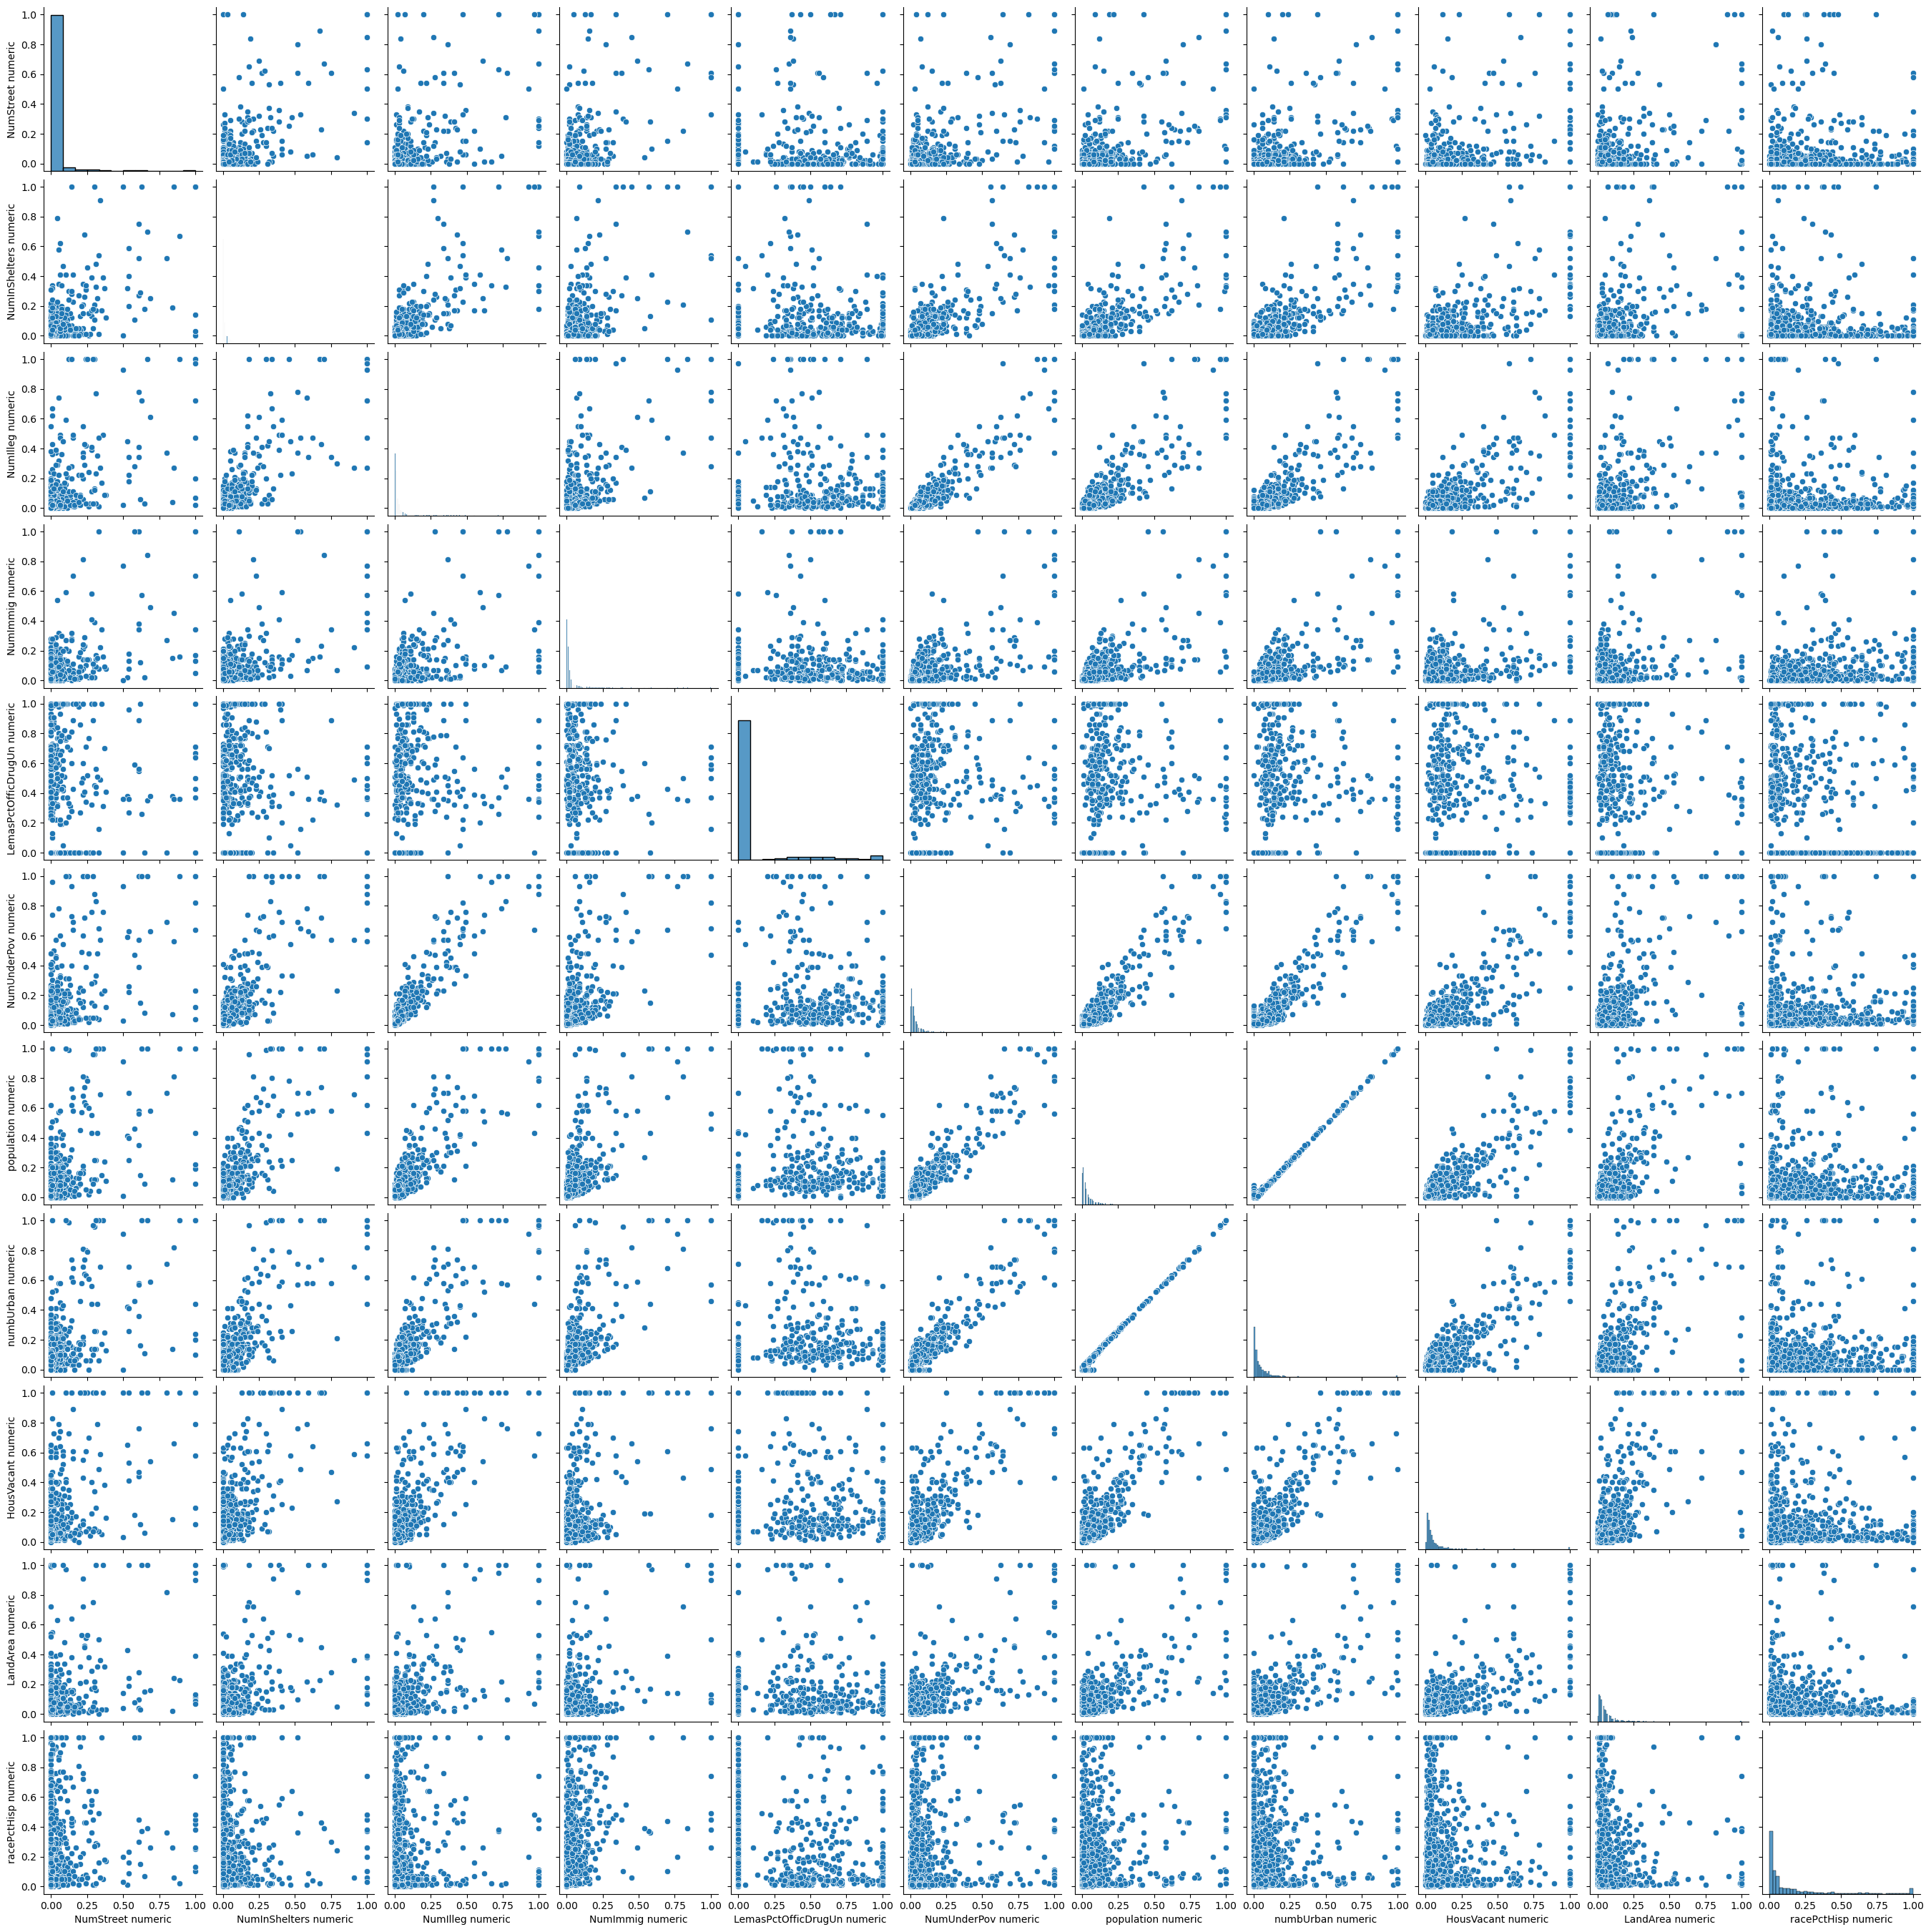

In [20]:
sns.pairplot(selected_df, kind="scatter")

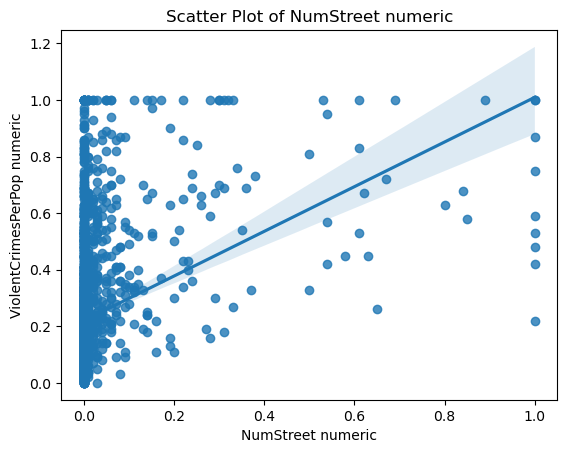

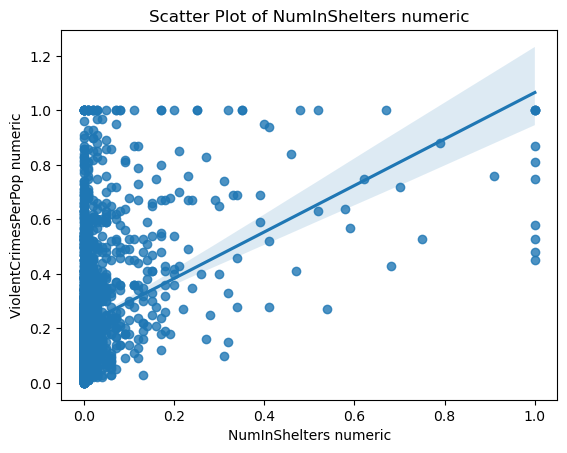

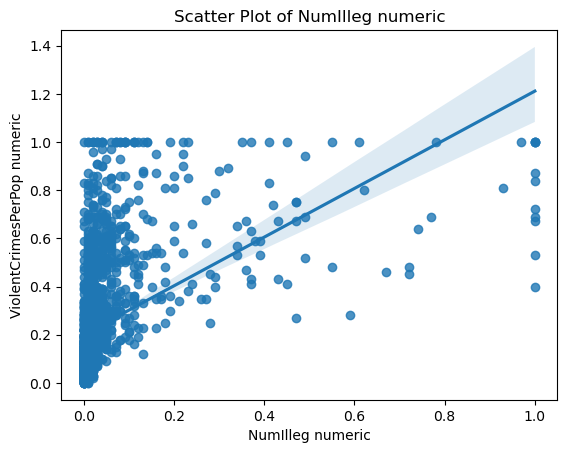

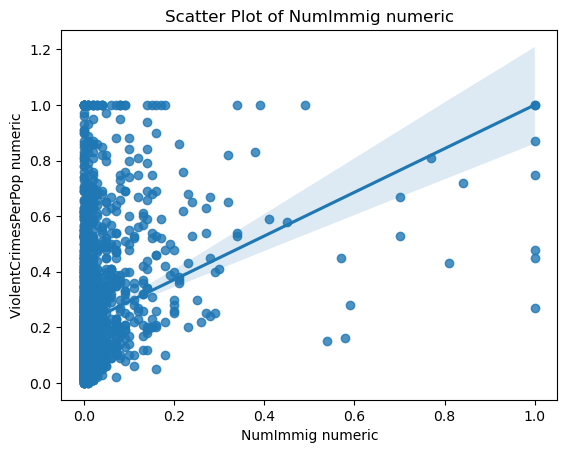

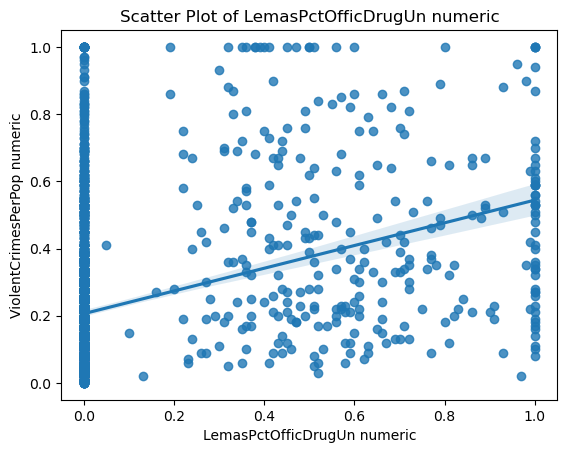

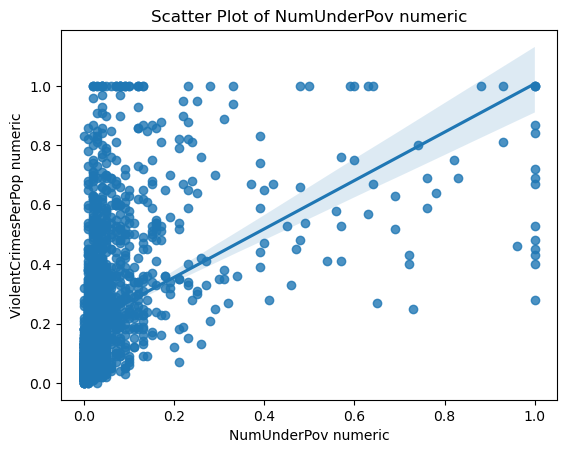

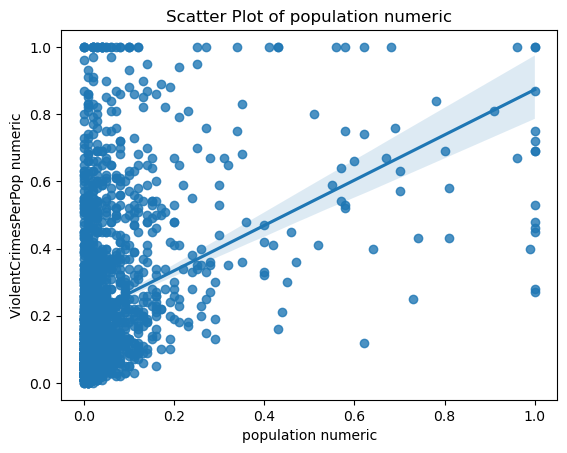

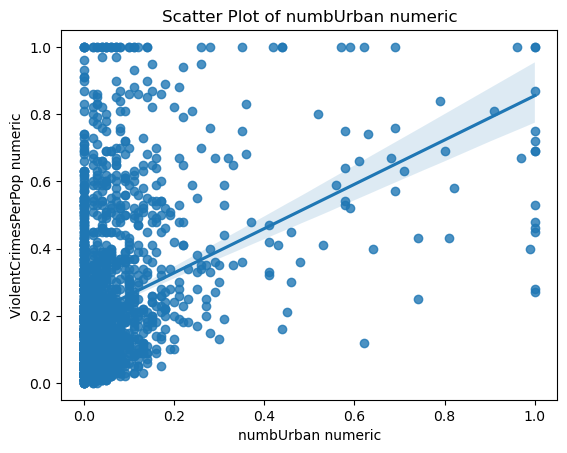

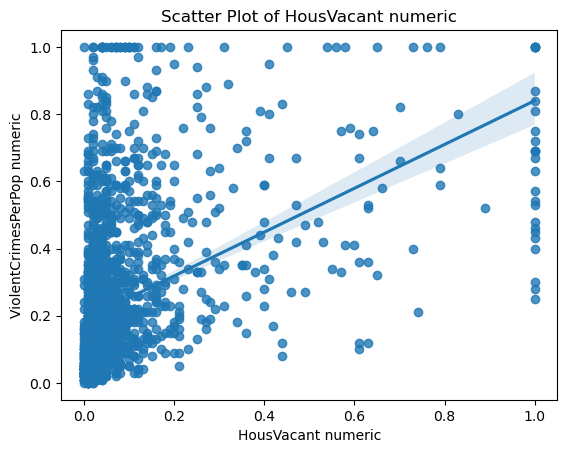

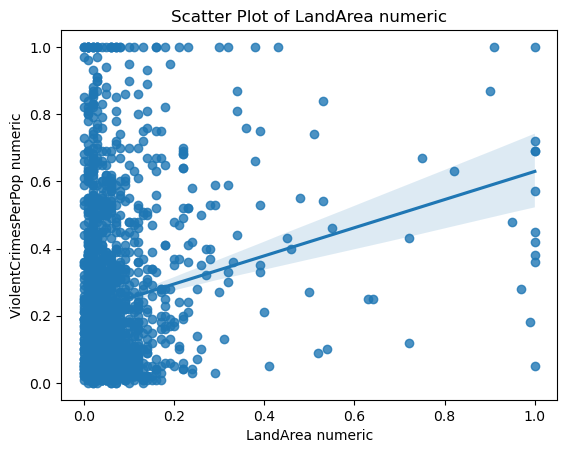

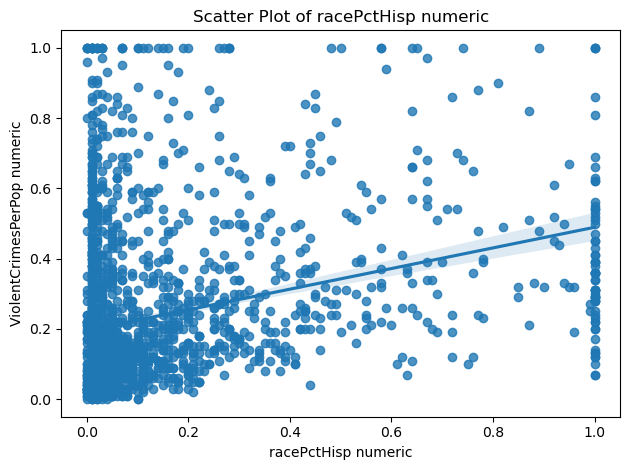

In [20]:
res = pd.concat([selected_df, df_comm.iloc[:,-1:]], axis =1)

for column in selected_df.columns:
    plt.figure()  # Create a new figure for each plot
    sns.regplot(x =column ,y = 'ViolentCrimesPerPop numeric', data = res)
    plt.xlabel(column)
    plt.ylabel('ViolentCrimesPerPop numeric')  # Use the column name as the y-axis label
    plt.title(f'Scatter Plot of {column}')
plt.tight_layout()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'NumStreet numeric'),
  Text(1, 0, 'NumInShelters numeric'),
  Text(2, 0, 'NumIlleg numeric'),
  Text(3, 0, 'NumImmig numeric'),
  Text(4, 0, 'LemasPctOfficDrugUn numeric'),
  Text(5, 0, 'NumUnderPov numeric'),
  Text(6, 0, 'population numeric'),
  Text(7, 0, 'numbUrban numeric'),
  Text(8, 0, 'HousVacant numeric'),
  Text(9, 0, 'LandArea numeric'),
  Text(10, 0, 'racePctHisp numeric')])

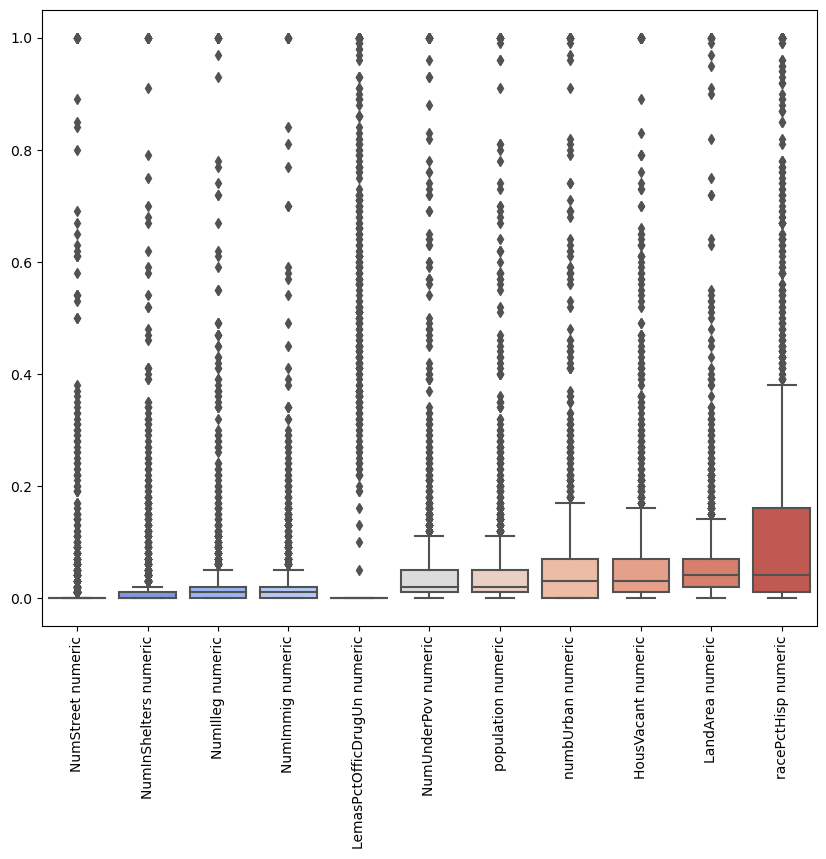

In [21]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=selected_df, palette = 'coolwarm')
plt.xticks(rotation = 90)

From the scatter plots, I cannot see significance of those features. These selected features do not have high correlation with the ViolentCrimesPerPop.

### (f) Fit a linear model

In [22]:
X_train = train_set.iloc[:, :-1]
y_train = train_set.iloc[:,-1:]
X_test = test_set.iloc[:, :-1]
y_test = test_set.iloc[:,-1:]

LR = LinearRegression()
LR.fit(X_train, y_train)

y_pred = LR.predict(X_test)

test_error = mean_squared_error(y_test, y_pred)

print(f"Test error is {test_error:.3f}")

Test error is 0.018


### (g) Fit a ridge regression model

In [23]:
alphas = [0.001, 0.01, 0.1, 1, 10, 100]

ridge_cv = RidgeCV(alphas=alphas, store_cv_values=True)

ridge_cv.fit(X_train, y_train)

best_alpha = ridge_cv.alpha_

ridge = ridge_cv.alpha_
ridge_model = Ridge(alpha=best_alpha)
ridge_model.fit(X_train, y_train)

y_pred = ridge_model.predict(X_test)
test_error = mean_squared_error(y_test, y_pred)

print(f'Best λ selected by cross-validation is: {best_alpha}, test error is {test_error}')

Best λ selected by cross-validation is: 1.0, test error is 0.017732474992896628


### (h) Fit a LASSO model

In [24]:
lasso = LassoCV(alphas=np.logspace(-6, 6, 13), cv=5)
lasso.fit(X_train, y_train)
best_alpha = lasso.alpha_

lasso_model = Lasso(alpha=best_alpha)
lasso_model.fit(X_train, y_train)

y_pred = lasso_model.predict(X_test)
test_error = mean_squared_error(y_test, y_pred)
print(f'Best Alpha = {best_alpha}, Test Error = {test_error}')

selected_variables = [feature for feature, coef in zip(df_comm.columns, lasso_model.coef_) if coef != 0]
print("Selected Variables:", selected_variables)

Best Alpha = 0.0001, Test Error = 0.01778608951910212
Selected Variables: ['racepctblack numeric', 'racePctAsian numeric', 'agePct12t21 numeric', 'agePct12t29 numeric', 'agePct65up numeric', 'pctUrban numeric', 'pctWWage numeric', 'pctWFarmSelf numeric', 'pctWInvInc numeric', 'pctWSocSec numeric', 'pctWPubAsst numeric', 'pctWRetire numeric', 'whitePerCap numeric', 'blackPerCap numeric', 'indianPerCap numeric', 'AsianPerCap numeric', 'OtherPerCap numeric', 'HispPerCap numeric', 'PctPopUnderPov numeric', 'PctLess9thGrade numeric', 'PctBSorMore numeric', 'PctEmploy numeric', 'PctEmplManu numeric', 'PctOccupManu numeric', 'MalePctDivorce numeric', 'MalePctNevMarr numeric', 'FemalePctDiv numeric', 'PctKids2Par numeric', 'PctYoungKids2Par numeric', 'PctTeen2Par numeric', 'PctWorkMom numeric', 'NumIlleg numeric', 'PctIlleg numeric', 'NumImmig numeric', 'PctImmigRec10 numeric', 'PctRecImmig10 numeric', 'PctNotSpeakEnglWell numeric', 'PctLargHouseOccup numeric', 'PersPerOccupHous numeric', 'Pct

In [25]:
# Repeat with standardized features. Report the test error for both cases and compare them.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lasso = LassoCV(alphas=np.logspace(-6, 6, 13), cv=5)
lasso.fit(X_train_scaled, y_train)
best_alpha = lasso.alpha_

lasso_model = Lasso(alpha=best_alpha)
lasso_model.fit(X_train_scaled, y_train)

y_pred = lasso_model.predict(X_test_scaled )
test_error = mean_squared_error(y_test, y_pred)
print(f'Best Alpha = {best_alpha}, Test Error = {test_error}')

# Variables with non-zero coefficients are selected
selected_variables = [feature for feature, coef in zip(df_comm.columns, lasso_model.coef_) if coef != 0]
print("Selected Variables:", selected_variables)

Best Alpha = 0.001, Test Error = 0.017758149260213713
Selected Variables: ['racepctblack numeric', 'agePct12t21 numeric', 'agePct12t29 numeric', 'pctUrban numeric', 'pctWWage numeric', 'pctWFarmSelf numeric', 'pctWInvInc numeric', 'pctWSocSec numeric', 'pctWPubAsst numeric', 'pctWRetire numeric', 'whitePerCap numeric', 'blackPerCap numeric', 'indianPerCap numeric', 'AsianPerCap numeric', 'OtherPerCap numeric', 'HispPerCap numeric', 'PctPopUnderPov numeric', 'PctLess9thGrade numeric', 'PctEmploy numeric', 'PctEmplManu numeric', 'MalePctDivorce numeric', 'MalePctNevMarr numeric', 'FemalePctDiv numeric', 'PctKids2Par numeric', 'PctYoungKids2Par numeric', 'PctTeen2Par numeric', 'PctWorkMom numeric', 'NumIlleg numeric', 'PctIlleg numeric', 'NumImmig numeric', 'PctImmigRec5 numeric', 'PctRecImmig10 numeric', 'PctNotSpeakEnglWell numeric', 'PctLargHouseOccup numeric', 'PctPersOwnOccup numeric', 'PctPersDenseHous numeric', 'PctHousLess3BR numeric', 'HousVacant numeric', 'PctHousOccup numeric',

The test errors of both models are almost the same. While the original features use a smaller alpha.

### (i) Fit a PCR model

In [26]:
M_values = range(1, len(X_train.columns) + 1)
cv_scores = []

for M in M_values:
    pca = PCA(n_components=M)
    X_train_pca = pca.fit_transform(X_train)
    
    model = LinearRegression()
    scores = cross_val_score(model, X_train_pca, y_train, cv=5, scoring='neg_mean_squared_error')
    
    # Calculate MSE from the negative MSE scores
    cv_scores.append(-np.mean(scores))

best_M = M_values[np.argmin(cv_scores)] # best_M has the lowest cross-validation error

pca = PCA(n_components=best_M)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train a linear regression model on the transformed training data
model = LinearRegression()
model.fit(X_train_pca, y_train)

y_pred = model.predict(X_test_pca) # Make predictions on the transformed test data

test_error = mean_squared_error(y_test, y_pred)

print(f"Best number of components (M): {best_M}")
print(f"Test Error (MSE): {test_error}")

Best number of components (M): 96
Test Error (MSE): 0.018472655724570627


### (j) Fit a boosting tree

In [33]:
alpha_values = np.logspace(-6, 6, 13)

best_alpha = None
best_mse = float('inf')

for alpha in alpha_values:
    xgb = XGBRegressor(objective='reg:squarederror', alpha=alpha)  # L1 regularization term is alpha
    kfold = KFold(n_splits=5, shuffle= True, random_state=66)
    cv_score = -cross_val_score(xgb, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    mean_mse = np.mean(cv_score) # aggregate the individual MSE values from each fold
    
    if mean_mse < best_mse:
        best_alpha = alpha
        best_mse = mean_mse
        
print("Best alpha:", best_alpha)

Best alpha: 1.0


Reference
1. https://www.kdnuggets.com/2017/05/simplifying-decision-tree-interpretation-decision-rules-python.html
2. https://stackoverflow.com/questions/29432629/plot-correlation-matrix-using-pandas